In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, TruncatedSVD, NMF

In [2]:
books_df = pd.read_csv('data/books_clean.csv')

In [3]:
books_df.head()

,Unnamed: 0,text_reviews_count,average_rating,num_pages,publication_year,ratings_count,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic"
0,5333265,1,4.00,256,1984,3,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1,1333909,6,3.23,256,2001,10,0.022321,0.977679,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2,7327624,7,4.03,600,1987,140,0.000000,0.195122,0.756098,0.024390,0.02439,0.000000,0.0,0.0,0.0,0.0
3,6066819,3282,3.49,368,2009,51184,0.000000,0.943878,0.000000,0.017007,0.00000,0.039116,0.0,0.0,0.0,0.0
4,287140,5,3.40,256,2011,15,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0


In [4]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941978 entries, 0 to 1941977
Data columns (total 16 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Unnamed: 0                              int64  
 1   text_reviews_count                      int64  
 2   average_rating                          float64
 3   num_pages                               int64  
 4   publication_year                        int64  
 5   ratings_count                           int64  
 6   history, historical fiction, biography  float64
 7   fiction                                 float64
 8   fantasy, paranormal                     float64
 9   mystery, thriller, crime                float64
 10  poetry                                  float64
 11  romance                                 float64
 12  non-fiction                             float64
 13  children                                float64
 14  young-adult                       

In [5]:
books_df = books_df.rename(columns={'Unnamed: 0': 'book_id'}).set_index('book_id')

In [17]:
scaler = StandardScaler()
normalizer = Normalizer()
normalized_df = normalizer.fit_transform(books_df)
scaled_df = scaler.fit_transform(books_df)

## PCA

In [22]:
pca = PCA().fit(scaled_df)

In [23]:
pca.explained_variance_ratio_

array([1.20591437e-01, 1.01578557e-01, 8.81535211e-02, 7.83789372e-02,
       7.43547637e-02, 7.19241068e-02, 7.06094186e-02, 6.90333635e-02,
       6.65982854e-02, 6.46133197e-02, 6.26657877e-02, 6.05997255e-02,
       5.77973852e-02, 1.31013915e-02, 1.92597574e-22])

In [24]:
pc_df = pd.DataFrame(pca.components_)
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.702038,0.019318,0.011457,0.001023,0.700797,-0.047539,0.046755,0.046364,0.008439,-0.014129,0.015470,-0.068503,-0.004148,0.059533,-0.012677
1,0.078227,0.061966,0.006325,-0.012055,0.087011,0.442797,-0.383809,-0.313213,-0.173139,0.048860,-0.183804,0.641578,-0.037062,-0.248260,0.005096
2,0.010972,-0.352526,0.056085,-0.029396,0.013085,0.194994,0.570641,-0.409027,0.341048,-0.100713,-0.349860,-0.062985,-0.120828,-0.241344,-0.121633
3,0.005729,-0.077100,0.201110,0.039624,-0.001429,0.166756,-0.077487,-0.096891,0.065424,-0.168000,0.696269,-0.078057,-0.568476,-0.189650,-0.162131
4,-0.019022,-0.032074,0.273262,-0.014925,-0.028103,0.330208,0.257650,0.348418,-0.478423,-0.283806,-0.190691,0.070204,-0.120122,0.345515,-0.376261


<Axes: >

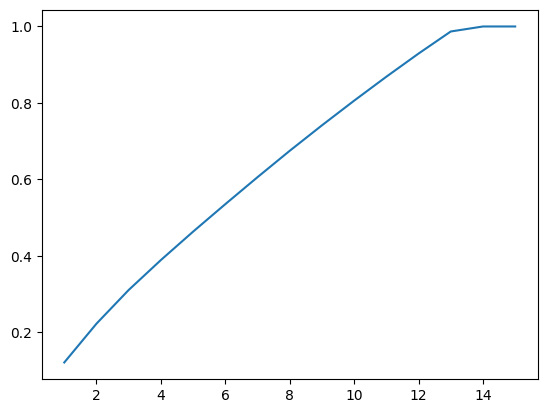

In [25]:
sns.lineplot(x=[x for x in range(1, 16)], y=np.cumsum(pca.explained_variance_ratio_))

## SVD

In [29]:
svd = TruncatedSVD()
svd.fit(scaled_df)
svd_df = pd.DataFrame(svd.components_)
svd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.702014,0.020804,0.011921,0.001584,0.700756,-0.048350,0.047323,0.046093,0.008632,-0.014344,0.015226,-0.067654,-0.004851,0.059663,-0.012905
1,0.078312,0.054568,0.003706,-0.014945,0.087194,0.446972,-0.386610,-0.312433,-0.174458,0.049740,-0.182555,0.637790,-0.033416,-0.249027,0.006384


In [28]:
sns.lineplot(x=[x for x in range(1, 15)], y=np.cumsum(svd.explained_variance_ratio_))

ValueError: All arrays must be of the same length